In [1]:
import pandas as pd

In [4]:
# load dataset
data = pd.read_csv("../data/prompt_components.csv")

In [5]:
data.head()

,repo_name,agent_name,role_description,context,tool_definitions,input,actions,security_disclaimer,constraints_restrictions,task_description_workflow,in_context_examples,output,external_information,placeholder,extra_codes
0,Deluxer_oliva,ASSISTANT_SYSTEM - Main AI Assistant Role,1,0,0,0,1,0,1,0,0,0,0,0,NaN
1,Deluxer_oliva,GRADE_DOCUMENTS_PROMPT - Document Relevance Gr...,1,0,0,1,0,0,1,1,0,1,0,1,NaN
2,Deluxer_oliva,GRADE_DOCUMENTS_PROMPT_OPT_2 - Document Releva...,1,0,0,1,0,0,0,1,1,1,0,1,NaN
3,Deluxer_oliva,BLOG_SEARCH_PROMPT - Blog Search Assistant,1,0,1,0,1,0,0,0,0,0,0,0,NaN
4,Deluxer_oliva,AMAZON_SEARCH_PROMPT - Product Search Assistant,1,0,1,0,1,0,1,0,0,0,0,0,NaN


## Component Prevalence Analysis


In [6]:
# Define component columns (binary features)
component_columns = [
    'role_description', 'context', 'tool_definitions', 'input', 'actions',
    'security_disclaimer', 'constraints_restrictions', 'task_description_workflow',
    'in_context_examples', 'output', 'external_information', 'placeholder'
]

print(f"Total number of prompts: {len(data)}")
print(f"Number of unique repos: {data['repo_name'].nunique()}")
print(f"Number of components tracked: {len(component_columns)}")


Total number of prompts: 268
Number of unique repos: 27
Number of components tracked: 12


### 1. Overall Prevalence of Each Component


In [ ]:
import matplotlib.pyplot as plt

Overall Component Prevalence (proportion of prompts containing each component):

task_description_workflow    0.917910
input                        0.832090
constraints_restrictions     0.820896
output                       0.820896
actions                      0.817164
placeholder                  0.779851
role_description             0.776119
context                      0.380597
tool_definitions             0.268657
in_context_examples          0.197761
external_information         0.156716
security_disclaimer          0.022388




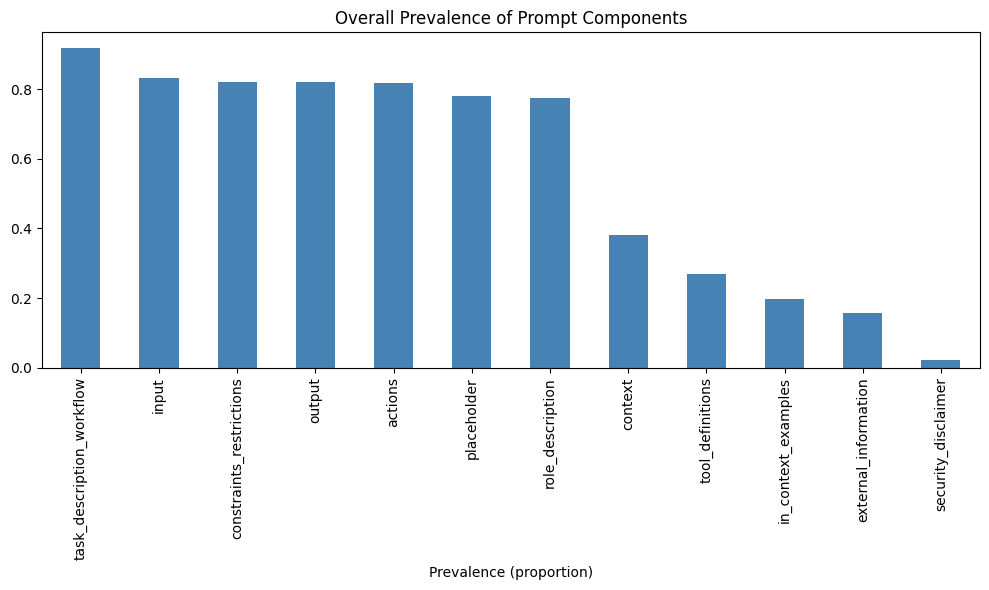

In [9]:
 # since the columns are just 0 or 1, we can use the mean to calculate the prevalence
overall_prevalence = data[component_columns].mean().sort_values(ascending=False)

print("Overall Component Prevalence (proportion of prompts containing each component):\n")
print(overall_prevalence.to_string())
print(f"\n")


plt.figure(figsize=(10, 6))
overall_prevalence.plot(kind='bar', color='steelblue')
plt.xlabel('Prevalence (proportion)')
plt.title('Overall Prevalence of Prompt Components')
plt.tight_layout()
plt.show()


### 2. Prevalence by Repository


In [ ]:
prevalence_by_repo = data.groupby('repo_name')[component_columns].mean()

print(f"Component Prevalence by Repository ({len(prevalence_by_repo)} repos):\n")
print(prevalence_by_repo.to_string())
print("\n")

# Show summary statistics
print("Summary Statistics Across Repos:")
print(prevalence_by_repo.describe().round(3))


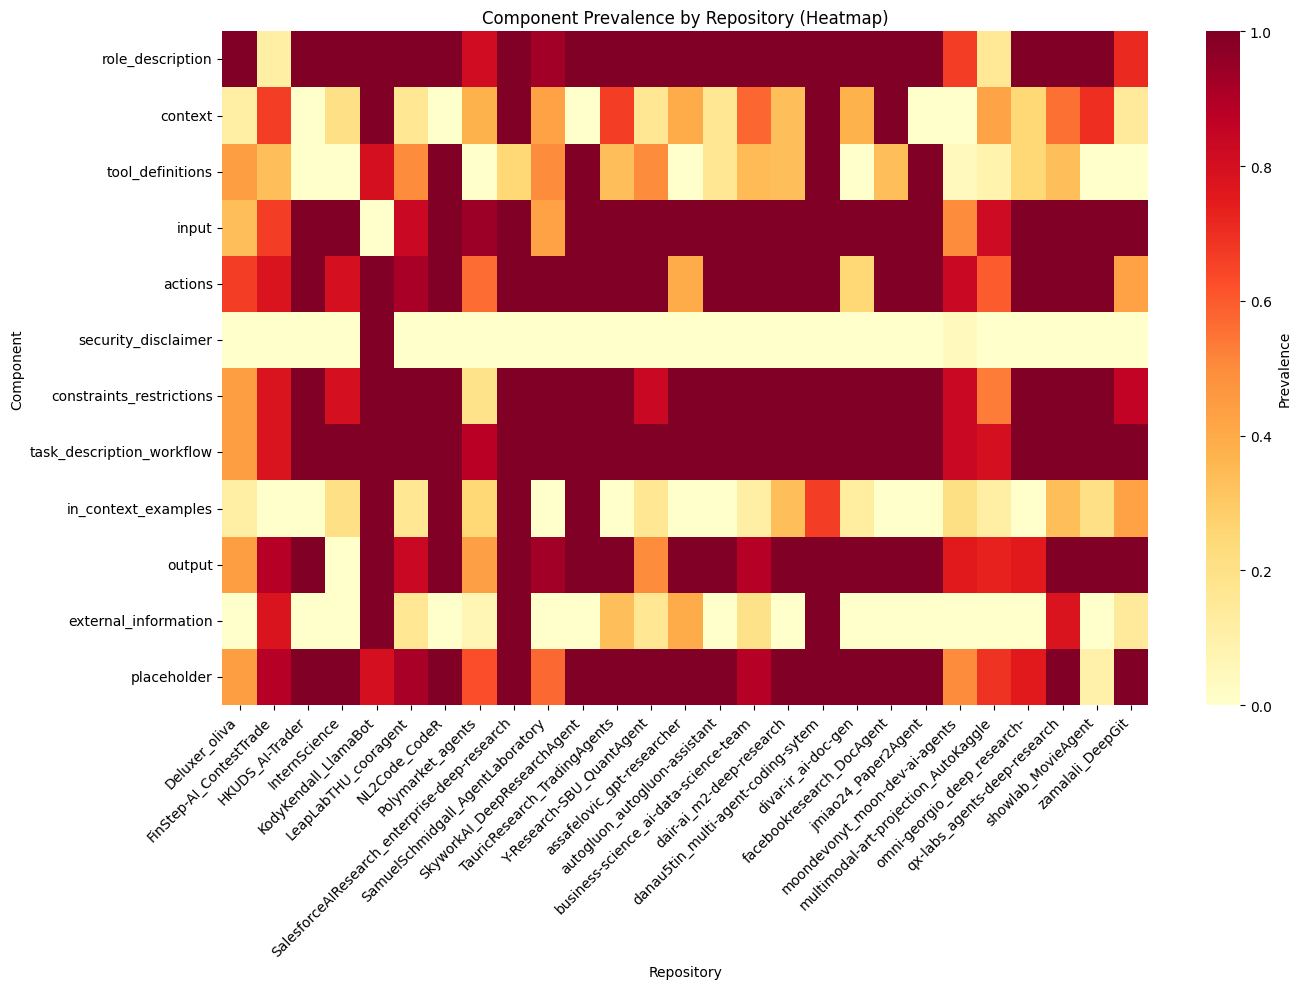

In [11]:
# Visualize prevalence by repo as heatmap
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(prevalence_by_repo.T, cmap='YlOrRd', annot=False, cbar_kws={'label': 'Prevalence'})
plt.xlabel('Repository')
plt.ylabel('Component')
plt.title('Component Prevalence by Repository (Heatmap)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 3. Prevalence by Agent Role


In [ ]:
# Examine unique agent names to understand roles
print(f"Total unique agent names: {data['agent_name'].nunique()}\n")
print("Sample agent names:")
print(data['agent_name'].value_counts().head(20))


In [12]:
def categorize_agent_role(agent_name):
    agent_name_lower = str(agent_name).lower()
    
    if any(keyword in agent_name_lower for keyword in ['planner', 'plan', 'coordinator', 'orchestrator', 'manager']):
        return 'Planner'
    elif any(keyword in agent_name_lower for keyword in ['evaluator', 'evaluate', 'grader', 'grade', 'reviewer', 'review', 'critic', 'judge', 'validator', 'verif']):
        return 'Evaluator'
    elif any(keyword in agent_name_lower for keyword in ['tool', 'search', 'retriev', 'executor', 'action', 'browser', 'scraper']):
        return 'Tool Agent'
    elif any(keyword in agent_name_lower for keyword in ['researcher', 'research', 'analyst', 'analyzer']):
        return 'Researcher'
    elif any(keyword in agent_name_lower for keyword in ['writer', 'generator', 'creator', 'composer', 'author']):
        return 'Writer/Generator'
    elif any(keyword in agent_name_lower for keyword in ['assistant', 'helper', 'support']):
        return 'Assistant'
    elif any(keyword in agent_name_lower for keyword in ['coder', 'developer', 'programmer', 'code']):
        return 'Coder'
    else:
        return 'Other'

data['agent_role'] = data['agent_name'].apply(categorize_agent_role)

# Show distribution of roles
print("Distribution of Agent Roles:")
print(data['agent_role'].value_counts())
print(f"\nTotal prompts: {len(data)}")

Distribution of Agent Roles:
agent_role
Other               109
Coder                41
Tool Agent           39
Planner              27
Writer/Generator     19
Researcher           17
Evaluator            13
Assistant             3
Name: count, dtype: int64

Total prompts: 268


In [17]:
# Calculate prevalence by agent role
prevalence_by_role = data.groupby('agent_role')[component_columns].mean()

print("Component Prevalence by Agent Role:\n")
print(prevalence_by_role.to_string())
print("\n")

# Show sample size for each role
print("Number of prompts per role:")
print(data['agent_role'].value_counts())


Component Prevalence by Agent Role:

                  role_description   context  tool_definitions     input   actions  security_disclaimer  constraints_restrictions  task_description_workflow  in_context_examples    output  external_information  placeholder
agent_role                                                                                                                                                                                                                    
Assistant                 1.000000  0.666667          0.000000  0.666667  0.333333             0.000000                  0.333333                   0.666667             0.000000  0.333333              0.000000     0.666667
Coder                     0.634146  0.439024          0.268293  0.878049  0.853659             0.000000                  0.853659                   0.951220             0.121951  0.804878              0.048780     0.853659
Evaluator                 0.769231  0.461538          0.076923  0.84615

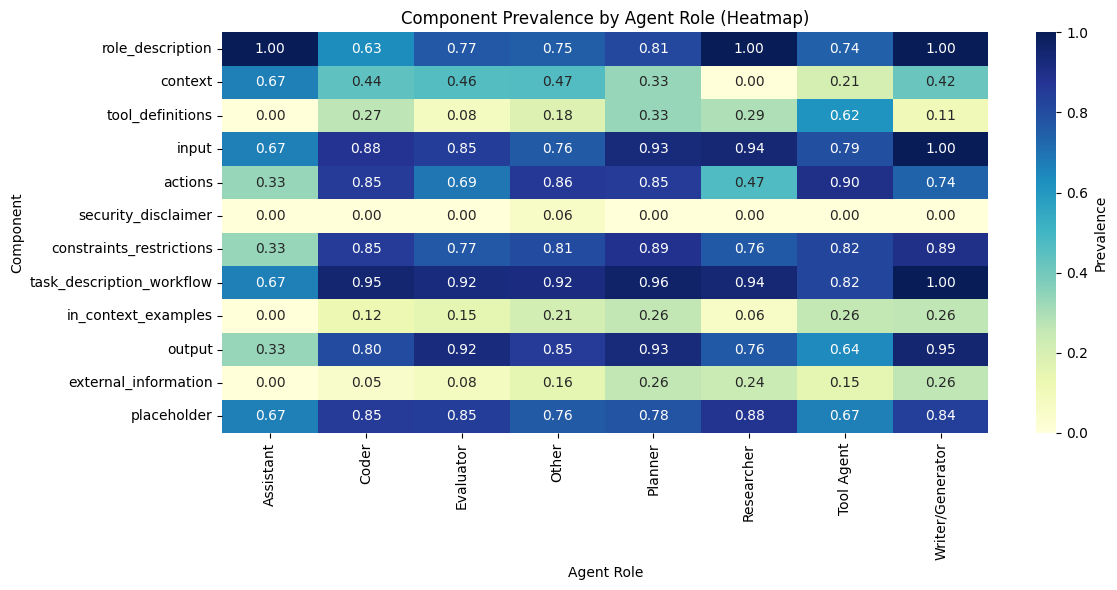

In [18]:
# Visualize prevalence by role as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(prevalence_by_role.T, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Prevalence'})
plt.xlabel('Agent Role')
plt.ylabel('Component')
plt.title('Component Prevalence by Agent Role (Heatmap)')
plt.tight_layout()
plt.show()


In [ ]:
# Create grouped bar chart for comparison
fig, ax = plt.subplots(figsize=(14, 6))
prevalence_by_role.T.plot(kind='bar', ax=ax, width=0.8)
plt.xlabel('Component')
plt.ylabel('Prevalence')
plt.title('Component Prevalence by Agent Role (Grouped Bar Chart)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Agent Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 4. Summary and Key Insights


In [ ]:
# Summary statistics and comparisons
print("="*60)
print("SUMMARY OF KEY FINDINGS")
print("="*60)

print("\n1. MOST COMMON COMPONENTS (Overall):")
print("-" * 60)
top_components = overall_prevalence.head(5)
for component, prevalence in top_components.items():
    print(f"   {component:.<40} {prevalence:.1%}")

print("\n2. LEAST COMMON COMPONENTS (Overall):")
print("-" * 60)
bottom_components = overall_prevalence.tail(5)
for component, prevalence in bottom_components.items():
    print(f"   {component:.<40} {prevalence:.1%}")

print("\n3. COMPONENT VARIANCE ACROSS ROLES:")
print("-" * 60)
role_variance = prevalence_by_role.var(axis=0).sort_values(ascending=False)
print("   Components with highest variance (most role-specific):")
for component, variance in role_variance.head(5).items():
    print(f"   {component:.<40} {variance:.4f}")

print("\n4. ROLE-SPECIFIC COMPONENT USAGE:")
print("-" * 60)
for role in prevalence_by_role.index:
    top_component = prevalence_by_role.loc[role].idxmax()
    top_value = prevalence_by_role.loc[role].max()
    print(f"   {role:.<30} → {top_component} ({top_value:.1%})")

print("\n" + "="*60)


### 5. Export Results (Optional)


In [ ]:
# Export results to CSV files (uncomment to save)
# overall_prevalence.to_csv('../results/overall_prevalence.csv', header=['prevalence'])
# prevalence_by_repo.to_csv('../results/prevalence_by_repo.csv')
# prevalence_by_role.to_csv('../results/prevalence_by_role.csv')

print("To export results, uncomment the lines above.")
